# EDA Y ETL BUSINESS

Contiene información del comercio, incluyendo localización, atributos y categorías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cargamos la data en un Data Frame

In [2]:
df = pd.read_pickle("c:/Users/leand/Desktop/Proyecto Final/Yelp/Datasets Yelp/business.pkl")

In [3]:
df.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

### Vemos que se cargo la data con columnas repetidas asi que procedemos a eliminar todas las columnas que se repiten

In [5]:
# Eliminar las columnas duplicadas, conservando la primera instancia de cada columna
df = df.loc[:,~df.columns.duplicated(keep='first')]

In [4]:
df.tail(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
150345,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,TN,33572,27.771002,-82.39491,4.5,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Eliminamos columnas

In [7]:
#Esta columna indica si un negocio esta abierto o cerrado en el momento, así que no nos sirve.
df.drop(columns='is_open',inplace=True)

### vemos si el id tiene duplicados

In [8]:
# Contar la cantidad total de duplicados en la columna 'business_id'
cantidad_duplicados = df['business_id'].duplicated().sum()

# Mostrar la cantidad total de duplicados
print("Cantidad total de duplicados en la columna 'business_id':", cantidad_duplicados)


Cantidad total de duplicados en la columna 'business_id': 0


### ¿Cuántos datos tenemos por Estado (state)?

In [12]:
# Rellena los valores nulos con una cadena vacía
df['state'].fillna('', inplace=True)

conteo_por_estado = df['state'].value_counts()
print(conteo_por_estado)

state
PA     34039
FL     26329
TN     12056
IN     11246
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2144
TX         4
CO         3
           3
WA         2
HI         2
MA         2
UT         1
NC         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64


In [13]:
print("Número de elementos en unique_categories:", len(conteo_por_estado))

Número de elementos en unique_categories: 28


### ¿Cuántos datos tenemos por ciudad (city)?

In [14]:
# Rellena los valores nulos con una cadena vacía
df['city'].fillna('', inplace=True)

conteo_por_ciudad = df['city'].value_counts()
print(conteo_por_ciudad)

city
Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: count, Length: 1416, dtype: int64


### Pasamos a la columna review_count

In [15]:
# Convierte la columna 'review_count' a tipo int
df['review_count'] = df['review_count'].astype(int)

### Vemos que locales son los que tienen mas reseñas

In [16]:
# Utiliza nlargest para obtener el top 10
top_10_filas = df.nlargest(10, 'review_count')
top_10_filas


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
113731,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,724 Iberville St,New Orleans,AZ,70130,29.954273,-90.068965,4.0,7568,"{'RestaurantsTakeOut': 'True', 'Alcohol': ''fu...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0..."
112552,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,739 Conti St,New Orleans,FL,70130,29.956231,-90.067563,4.0,7400,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Seafood, Cajun/Creole, Breakfast ...","{'Monday': '8:0-1:0', 'Tuesday': '8:0-1:0', 'W..."
91757,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,112 19th Ave S,Nashville,NJ,37203,36.151387,-86.796603,4.5,6093,"{'RestaurantsGoodForGroups': 'True', 'Business...","American (Traditional), Chicken Shop, Southern...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
143157,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,51 N 12th St,Philadelphia,PA,19107,39.953341,-75.158855,4.5,5721,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
147081,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,200 Magazine St,New Orleans,FL,70130,29.951025,-90.067394,4.5,5193,"{'NoiseLevel': ''loud'', 'Caters': 'False', 'B...","Restaurants, American (Traditional), American ...","{'Monday': '0:0-0:0', 'Tuesday': '7:30-14:0', ..."
100024,iSRTaT9WngzB8JJ2YKJUig,Mother's Restaurant,401 Poydras St,New Orleans,IL,70130,29.949057,-90.067049,3.5,5185,"{'RestaurantsGoodForGroups': 'True', 'BYOBCork...","Cajun/Creole, Restaurants, Event Planning & Se...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-17:0', '..."
31033,VQcCL9PiNL_wkGf-uF3fjg,Royal House,441 Royal St,New Orleans,NJ,70130,29.956473,-90.066386,4.0,5070,"{'WiFi': 'u'free'', 'Caters': 'False', 'Outdoo...","American (New), Restaurants, Sandwiches, Seafo...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
31332,_C7QiQQc47AOEv4PE3Kong,Commander's Palace,1403 Washington Ave,New Orleans,PA,70130,29.928735,-90.084196,4.5,4876,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","French, Restaurants, Cocktail Bars, Nightlife,...","{'Monday': '0:0-0:0', 'Tuesday': '18:0-21:30',..."
4497,GBTPC53ZrG1ZBY3DT8Mbcw,Luke,333 Saint Charles Ave,New Orleans,PA,70130,29.950742,-90.070416,4.0,4554,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ..."
97331,6a4gLLFSgr-Q6CZXDLzBGQ,Cochon,930 Tchoupitoulas St,New Orleans,MO,70130,29.94228,-90.067268,4.0,4421,"{'BikeParking': 'True', 'BusinessParking': '{'...","Cajun/Creole, Seafood, Restaurants","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."


Son todos sobre restaurants

# Columna attributes

 "RestaurantsTakeOut": indica que el restaurante permite llevar comida.
 

 "BusinessParking" Se subdivide en distintos tipos:


"garage": Indica si el negocio tiene estacionamiento en garaje. 

"street": Indica si el negocio tiene estacionamiento en la calle. 

"validated": Indica si el negocio ofrece validación de estacionamiento. 

"lot": Indica si el negocio tiene un lote de estacionamiento propio. 

"valet": Indica si el negocio ofrece servicio de valet. 

### Vemos las distintas categorias con las que contamos

In [18]:
# Rellena los valores nulos con una cadena vacía
df['categories'].fillna('', inplace=True)

# Creamos una lista con los valores unicos de las categorias
categorias_unicas = df['categories'].str.split(', ').explode().unique().tolist()

In [19]:
print("Número de elementos en categorias_unicas:", len(categorias_unicas))

Número de elementos en categorias_unicas: 1312


In [20]:
print(categorias_unicas)

['Doctors', 'Traditional Chinese Medicine', 'Naturopathic/Holistic', 'Acupuncture', 'Health & Medical', 'Nutritionists', 'Shipping Centers', 'Local Services', 'Notaries', 'Mailbox Centers', 'Printing Services', 'Department Stores', 'Shopping', 'Fashion', 'Home & Garden', 'Electronics', 'Furniture Stores', 'Restaurants', 'Food', 'Bubble Tea', 'Coffee & Tea', 'Bakeries', 'Brewpubs', 'Breweries', 'Burgers', 'Fast Food', 'Sandwiches', 'Ice Cream & Frozen Yogurt', 'Sporting Goods', 'Shoe Stores', 'Sports Wear', 'Accessories', 'Synagogues', 'Religious Organizations', 'Pubs', 'Italian', 'Bars', 'American (Traditional)', 'Nightlife', 'Greek', 'Vietnamese', 'Food Trucks', 'Diners', 'Breakfast & Brunch', 'General Dentistry', 'Dentists', 'Cosmetic Dentists', 'Delis', 'Sushi Bars', 'Japanese', 'Automotive', 'Auto Parts & Supplies', 'Auto Customization', 'Vape Shops', 'Tobacco Shops', 'Personal Shopping', 'Vitamins & Supplements', 'Car Rental', 'Hotels & Travel', 'Truck Rental', 'Korean', 'Cafes', 

# Ahora vamos a crear un nuevo df en donde se encontraran solo las categorias que sean del rubro gastronomico

In [28]:
categorias_deseadas = [
    'Restaurants', 'Food', 'Bubble Tea', 'Coffee & Tea', 'Bakeries', 'Brewpubs', 'Breweries', 'Burgers', 'Fast Food',
    'Sandwiches', 'Ice Cream & Frozen Yogurt', 'Diners', 'Breakfast & Brunch', 'Sushi Bars',
    'Cafes', 'Wine Bars', 'Steakhouses', 'Asian Fusion', 'Hot Dogs', 'Seafood', 'Cocktail Bars', 'Pizza',
    'Chicken Wings', 'Salad', 'Soup', 'Juice Bars & Smoothies', 'American (New)', 'Sports Bars', 'Gastropubs',
    'Beer Bar', 'Cajun/Creole'
]

# Filtrar el DataFrame
df_rest = df[df['categories'].apply(lambda x: any(cat in x for cat in categorias_deseadas))]

# Reiniciar los índices del nuevo DataFrame
df_rest = df_rest.reset_index(drop=True)

In [37]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,,93101,34.426679,-119.711197,5.0,7,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,,63123,38.551126,-90.335695,3.0,15,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,,85711,32.223236,-110.880452,3.5,22,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [40]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65260 entries, 0 to 65259
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   65260 non-null  object 
 1   name          65260 non-null  object 
 2   address       65260 non-null  object 
 3   city          65260 non-null  object 
 4   state         65260 non-null  object 
 5   postal_code   65260 non-null  object 
 6   latitude      65260 non-null  float64
 7   longitude     65260 non-null  float64
 8   stars         65260 non-null  float64
 9   review_count  65260 non-null  int32  
 10  attributes    64375 non-null  object 
 11  categories    65260 non-null  object 
 12  hours         55833 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 6.2+ MB


### Pasaremos las columnas a su formato correcto

In [39]:
df_rest['latitude'] = df_rest['latitude'].astype(float)
df_rest['longitude'] = df_rest['longitude'].astype(float)
df_rest['stars'] = df_rest['stars'].astype(float)
df_rest['review_count'] = df_rest['review_count'].astype(int)

In [41]:
a = df_rest['postal_code'].unique

In [43]:
print(a)

<bound method Series.unique of 0          19107
1          18054
2          37015
3          63123
4          37207
          ...   
65255      83704
65256      85737
65257      19147
65258      19014
65259    T5T 1K8
Name: postal_code, Length: 65260, dtype: object>


### Podemos ver que en la columna postal_code no todos los datos son numericos, en Estados Unidos tambien poseen codigos postales que incluyen letras. Así que no le cambiaremos el tipo

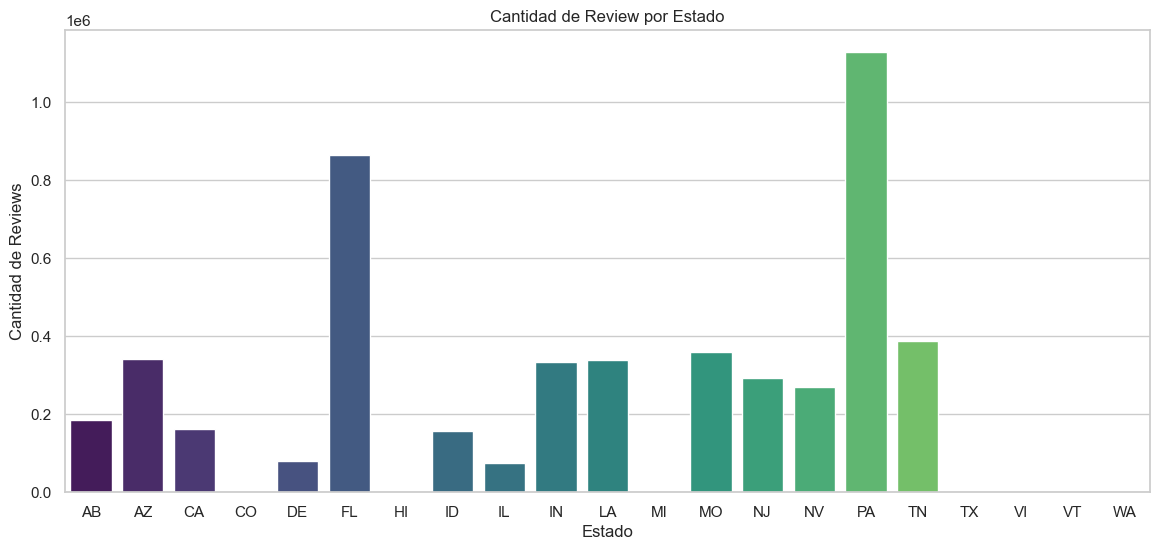

In [59]:
# Agrupa el DataFrame por estado y suma la cantidad de reviews en cada estado
df_agrupado = df_rest.groupby('state')['review_count'].sum().reset_index()

# Crea el gráfico de barras
plt.figure(figsize=(14, 6))
barplot = sns.barplot(x='state', y='review_count', data=df_agrupado, hue= 'state', palette= 'viridis')

# Añade etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reviews')
plt.title('Cantidad de Review por Estado')

# Muestra el gráfico
plt.show()
